# Project exploration and stuff

In [101]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv, find_dotenv
import json

In [116]:
file_name = "../keys.json"
with open(file_name, "r") as key_file:
    keys = json.load(key_file)

In [118]:
cc_apikey =  keys["CRYPTOCOMPARE_API_KEY"]

cc_url = "https://min-api.cryptocompare.com/data/"
cc_hist_url = "v2/histoday?"
cc_headers = {'authorization' : cc_apikey}

token = "BTC"
dollar = "USD"

In [53]:
cc_hist_params = {"e":"Coinbase",
                  "fsym":token,
                  "tsym":dollar,
                  "toTs": 1464739200,
                  "limit":2000}

In [54]:
hist_response_2 = requests.get(cc_url+cc_hist_url, headers = cc_headers, params = cc_hist_params)

In [12]:
hist_response.json()["Data"]

{'Aggregated': False,
 'TimeFrom': 1464739200,
 'TimeTo': 1637539200,
 'Data': [{'time': 1464739200,
   'close': 536.99,
   'high': 541.5,
   'low': 524.39,
   'open': 531.47,
   'volumefrom': 5478.68,
   'volumeto': 2922686.73,
   'conversionType': 'force_direct',
   'conversionSymbol': ''},
  {'time': 1464825600,
   'close': 538.53,
   'high': 541.2,
   'low': 531.86,
   'open': 536.99,
   'volumefrom': 6248.35,
   'volumeto': 3349006.03,
   'conversionType': 'force_direct',
   'conversionSymbol': ''},
  {'time': 1464912000,
   'close': 570,
   'high': 578,
   'low': 535.96,
   'open': 538.53,
   'volumefrom': 10135.11,
   'volumeto': 5672990.35,
   'conversionType': 'force_direct',
   'conversionSymbol': ''},
  {'time': 1464998400,
   'close': 575.56,
   'high': 594.64,
   'low': 564.29,
   'open': 570,
   'volumefrom': 6847.53,
   'volumeto': 3944860.78,
   'conversionType': 'force_direct',
   'conversionSymbol': ''},
  {'time': 1465084800,
   'close': 574.86,
   'high': 585,
   'l

In [55]:
coinbase_btc_hist_2 = pd.DataFrame(hist_response_2.json()["Data"]["Data"]

,time,close,high,low,open,volumefrom,volumeto,conversionType,conversionSymbol
0,1291939200,1.438861e+08,1.438861e+08,1.438861e+08,1.438861e+08,0.00,0.00,force_direct,
1,1292025600,1.438861e+08,1.438861e+08,1.438861e+08,1.438861e+08,0.00,0.00,force_direct,
2,1292112000,1.438861e+08,1.438861e+08,1.438861e+08,1.438861e+08,0.00,0.00,force_direct,
3,1292198400,1.438861e+08,1.438861e+08,1.438861e+08,1.438861e+08,0.00,0.00,force_direct,
4,1292284800,1.438861e+08,1.438861e+08,1.438861e+08,1.438861e+08,0.00,0.00,force_direct,
...,...,...,...,...,...,...,...,...,...
1996,1464393600,5.280400e+02,5.394900e+02,4.700400e+02,4.709400e+02,11586.13,5788352.77,force_direct,
1997,1464480000,5.247000e+02,5.499900e+02,4.923500e+02,5.280400e+02,9381.73,4930193.25,force_direct,
1998,1464566400,5.330000e+02,5.410000e+02,5.190000e+02,5.247000e+02,5894.76,3131497.89,force_direct,
1999,1464652800,5.314700e+02,5.449000e+02,5.200100e+02,5.330000e+02,8448.61,4496495.27,force_direct,


In [60]:
coinbase_btc_hist_3 = coinbase_btc_hist_2[coinbase_btc_hist_2["volumefrom"] != 0]

In [65]:
coinbase_btc_big = coinbase_btc_hist_3.append(coinbase_btc_hist, ignore_index=True)[["time","close","high","low","open","volumeto","volumefrom"]]

In [18]:
def to_readable_datetime(x):
    from datetime import datetime
    return datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S')


In [56]:
coinbase_btc_hist_2["time"] = coinbase_btc_hist_2["time"].map(to_readable_datetime)
coinbase_btc_hist_2["time"] = pd.to_datetime(coinbase_btc_hist_2["time"])

In [19]:
coinbase_btc_hist["time"] = coinbase_btc_hist["time"].map(to_readable_datetime)
coinbase_btc_hist["time"] = pd.to_datetime(coinbase_btc_hist["time"])

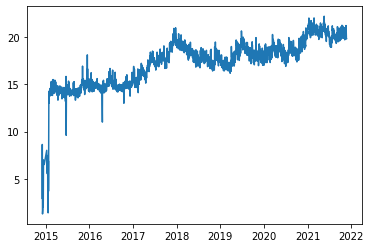

In [64]:
plt.plot(coinbase_btc_big["time"],np.log(coinbase_btc_big["volumeto"]),)

In [24]:
coinbase_btc_hist["delta_volumeto"]=coinbase_btc_hist["volumeto"].diff()

In [39]:
coinbase_btc_hist["rolling_30days"] = coinbase_btc_hist[["delta_volumeto"]].rolling(30).mean()["delta_volumeto"]

In [33]:
from sklearn.metrics import mean_squared_error, m

In [47]:
np.sqrt(mean_squared_error(coinbase_btc_hist.loc[1:,"volumeto"], coinbase_btc_hist["volumeto"].diff()[1:]))

437120484.34631044

In [46]:
coinbase_btc_hist["volumeto"].mean()

225373817.64311343

In [75]:
df = coinbase_btc_big.copy()

# Defining features

In [84]:
df.set_index("time", inplace = True)

In [77]:
df["mean_price"] = (df["high"] + df["low"])/2

In [78]:
df["volumefrom_USD"] = df["volumefrom"]*df["mean_price"]

In [80]:
df["volume_net"] = df["volumeto"] - df["volumefrom_USD"]

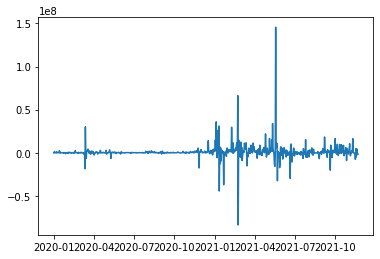

In [89]:
plt.plot(df.loc[pd.to_datetime("2020-01-01"):,"volume_net"])

In [90]:
df["volume_gross"] = df["volumeto"] + df["volumefrom_USD"]

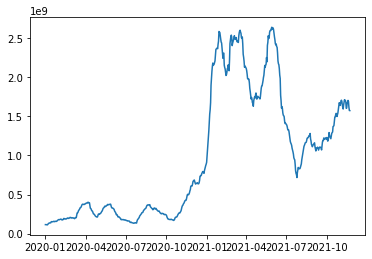

In [100]:
plt.plot(df.loc[pd.to_datetime("2020-01-01"):,"volume_gross_30"])

In [97]:
df["volume_gross_30"] = df["volume_gross"].rolling(30).mean()

In [98]:
df

,close,high,low,open,volumeto,volumefrom,mean_price,volumefrom_USD,volume_net,volume_gross,volume_gross_30
time,,,,,,,,,,,
2014-12-01,370.00,370.00,300.00,300.00,1.953000e+01,0.05656,335.000,1.894760e+01,5.824000e-01,3.847760e+01,NaN
2014-12-02,378.00,378.00,370.00,370.00,5.675070e+03,15.01000,374.000,5.613740e+03,6.133000e+01,1.128881e+04,NaN
2014-12-03,378.00,378.00,377.01,378.00,2.065200e+02,0.54660,377.505,2.063442e+02,1.757670e-01,4.128642e+02,NaN
2014-12-04,377.10,378.00,377.10,378.00,3.771000e+00,0.01000,377.550,3.775500e+00,-4.500000e-03,7.546500e+00,NaN
2014-12-06,378.00,378.00,377.10,377.10,5.670000e+00,0.01500,377.550,5.663250e+00,6.750000e-03,1.133325e+01,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-18,56898.00,60977.21,56514.13,60351.51,1.566051e+09,26742.24000,58745.670,1.570991e+09,-4.939710e+06,3.137042e+09,1.702896e+09
2021-11-19,58122.16,58412.12,55625.00,56898.00,1.062148e+09,18548.35000,57018.560,1.057600e+09,4.548207e+06,2.119749e+09,1.689764e+09
2021-11-20,59760.76,59900.00,57423.35,58122.16,4.448062e+08,7582.40000,58661.675,4.447963e+08,9.868630e+03,8.896024e+08,1.618839e+09


In [99]:
df.to_csv("../raw_data/coinbase_2014-2021.csv")